In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
from collections import namedtuple

In [11]:
import sys
sys.path.append('../src')  # Asegúrate de que el path es correcto respecto a la ubicación del notebook o script que lo importa
from plotting_functions import draw_interp_plots


### Ahora construiremos algunos gráficos de interés para historiadores geopolíticos como Adam Tooze.

Nos centraremos en el Producto Interior Bruto (PIB) total (como indicador del "poder geopolítico-militar nacional") en lugar de centrarnos en el PIB per cápita (como indicador del nivel de vida).



In [7]:
# Obtener el directorio actual (notebooks)
current_dir = os.getcwd()

# Navegar un nivel hacia arriba para llegar al directorio base del proyecto
base_dir = os.path.dirname(current_dir)

# Construir la ruta al archivo CSV en la carpeta df/external
xlsx_path = os.path.join(base_dir, 'data', 'external', 'mpd2020.xlsx')


# Leer el archivo CSV usando pandas
df = pd.read_excel(xlsx_path,sheet_name='Full data')
df.set_index(['countrycode', 'year'], inplace=True)

# Mostrar las primeras filas del dfFrame

df.head()

country   gdppc     pop
countrycode year                             
AFG         1820  Afghanistan     NaN  3280.0
            1870  Afghanistan     NaN  4207.0
            1913  Afghanistan     NaN  5730.0
            1950  Afghanistan  1156.0  8150.0
            1951  Afghanistan  1170.0  8284.0

In [8]:
df['gdp'] = df['gdppc'] * df['pop']
gdp = df['gdp'].unstack('countrycode')

### Industrialización temprana (1820 a 1940)
Primero visualizamos la tendencia de China, la antigua Unión Soviética, Japón, el Reino Unido y Estados Unidos.

La tendencia más notable es el ascenso de EE.UU., que supera al Reino Unido en la década de 1860 y a China en la de 1880.

El crecimiento continuó hasta la gran caída de los años 30, cuando se produjo la Gran Depresión.

Mientras tanto, Rusia sufrió importantes reveses durante la Primera Guerra Mundial y se recuperó notablemente tras la Revolución de Febrero.

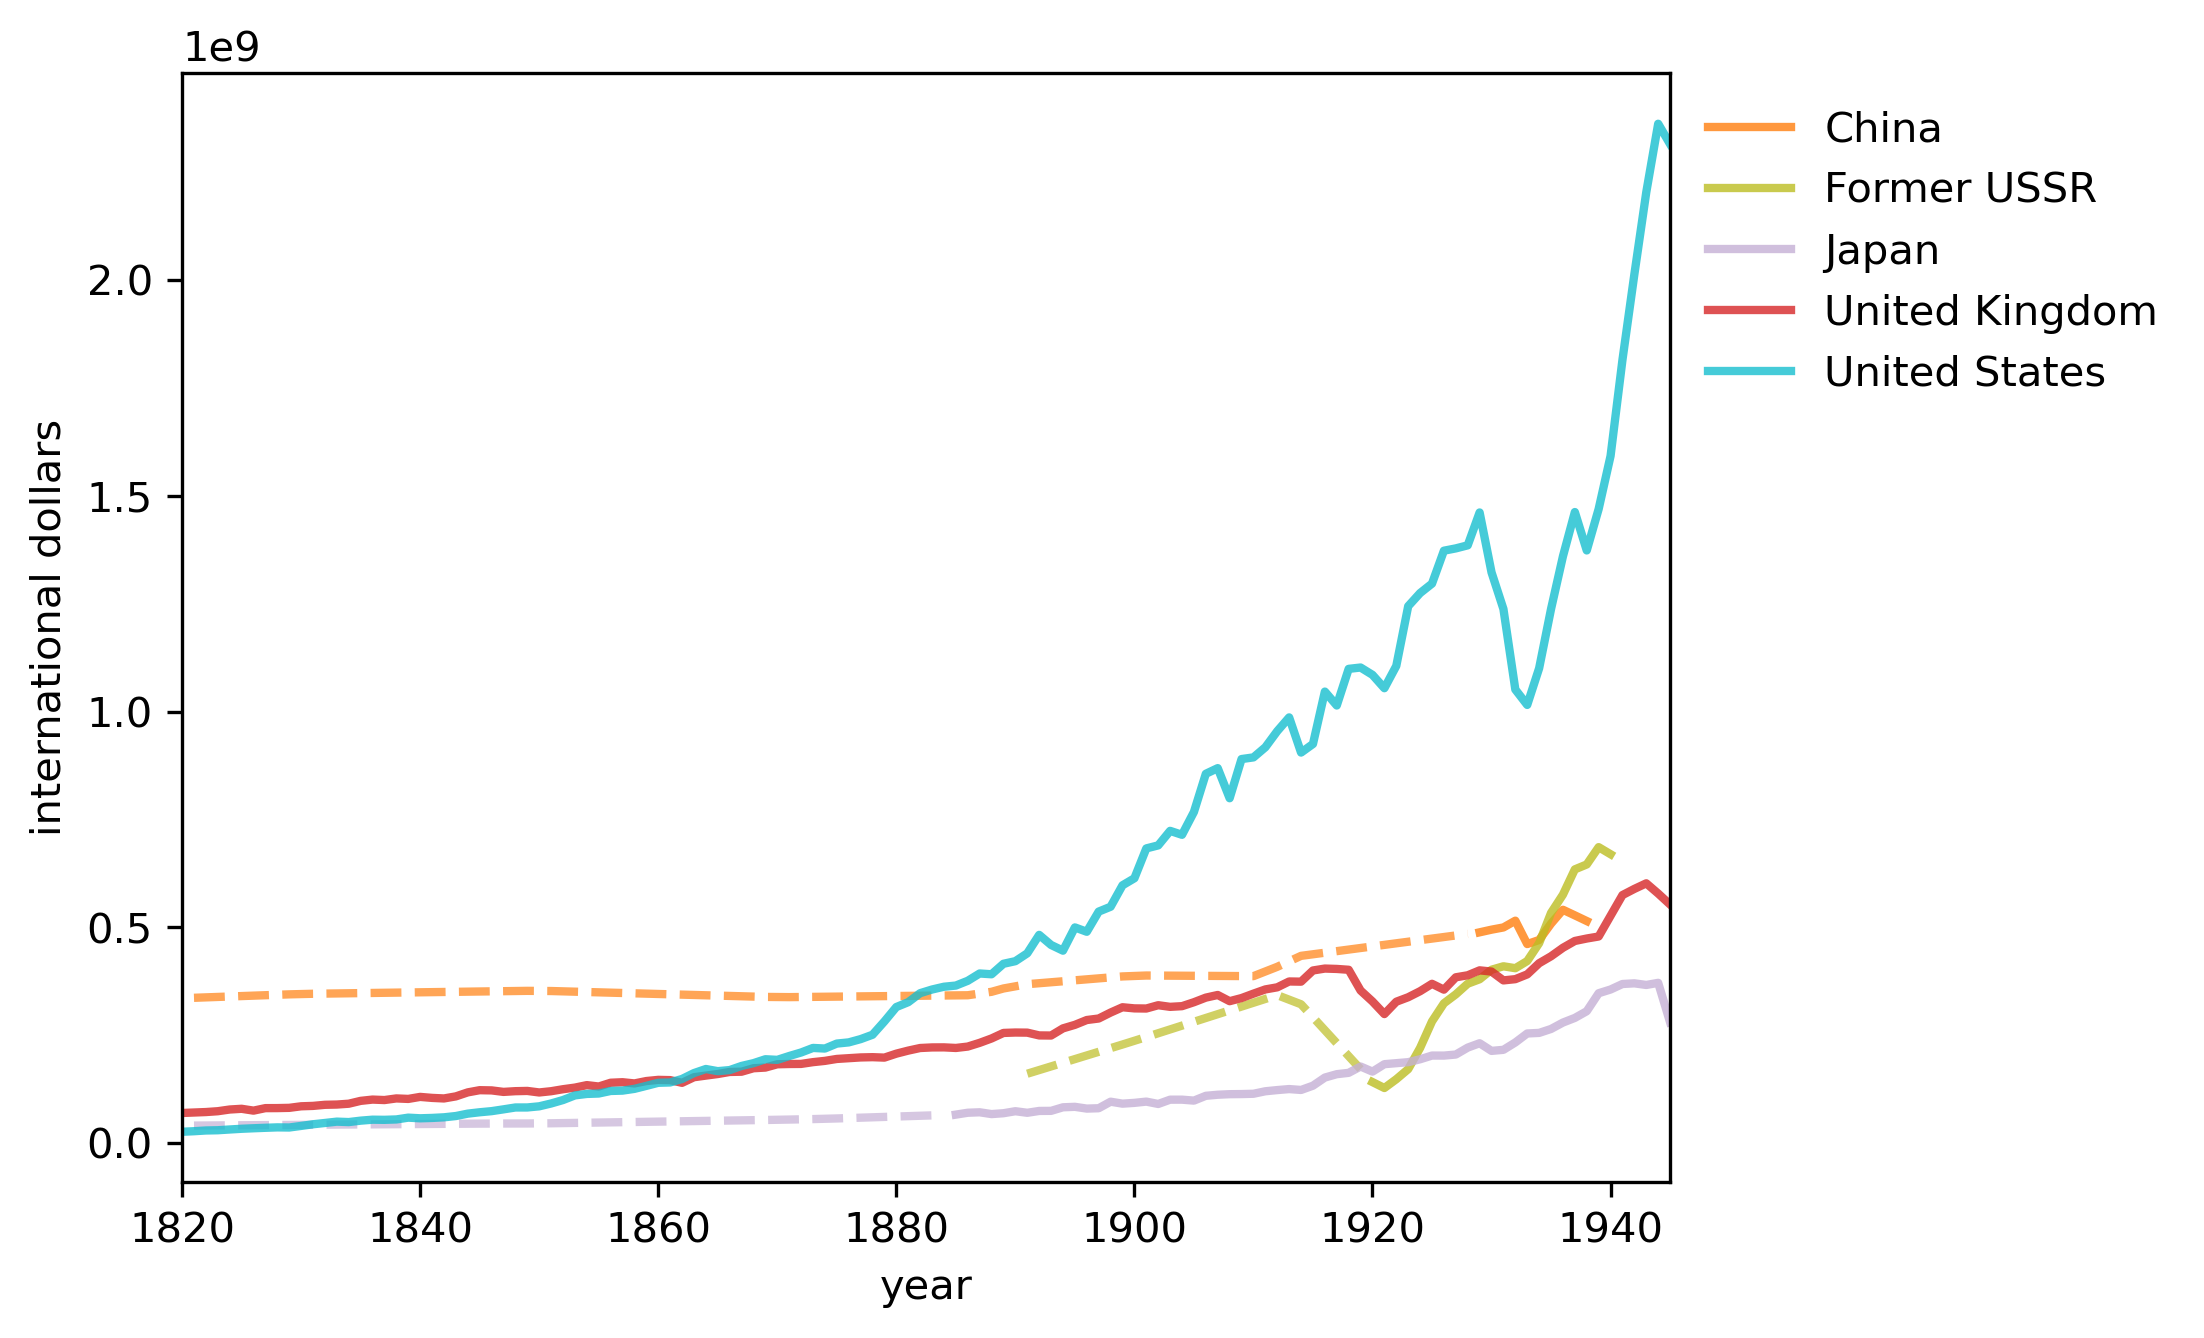

In [12]:
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1820, 1945)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

## Construcción de un gráfico similar al de Tooze
En esta sección describimos cómo hemos construido una versión de la llamativa figura del capítulo 1 de [Tooze, 2014] que comentamos al principio de esta clase.

Definamos primero una colección de países que consiste en el Imperio Británico (BEM) para que podamos replicar esa serie en el gráfico de Tooze.

In [13]:
# Lista de códigos de países que formaban parte del Imperio Británico para el análisis.
BEM = ['GBR', 'IND', 'AUS', 'NZL', 'CAN', 'ZAF']

# Interpola las series temporales incompletas para cada uno de los países en la lista BEM
# desde el año 'start_year-1' hasta 'end_year' usando el método 'index', que utiliza los índices
# (en este caso, probablemente años) para hacer una interpolación lineal.
# Suma los resultados de todos estos países columna por columna para obtener una serie única.
gdp['BEM'] = gdp[BEM].loc[start_year-1:end_year].interpolate(method='index').sum(axis=1)


In [14]:
# Define el mapeo de colores para el nuevo grupo 'BEM', asignando el mismo color que el de Gran Bretaña.
color_mapping['BEM'] = color_mapping['GBR']

# Crea un DataFrame para agregar la entidad 'British Empire' con el código 'BEM'
# Esto se hace para poder tener un nombre asociado con el código en el DataFrame 'code_to_name'.
bem = pd.DataFrame(["British Empire"], index=["BEM"], columns=['country'])
bem.index.name = 'countrycode'

# Concatena este nuevo DataFrame con el DataFrame existente 'code_to_name'
# para incluir el Imperio Británico como una nueva entrada.
code_to_name = pd.concat([code_to_name, bem])

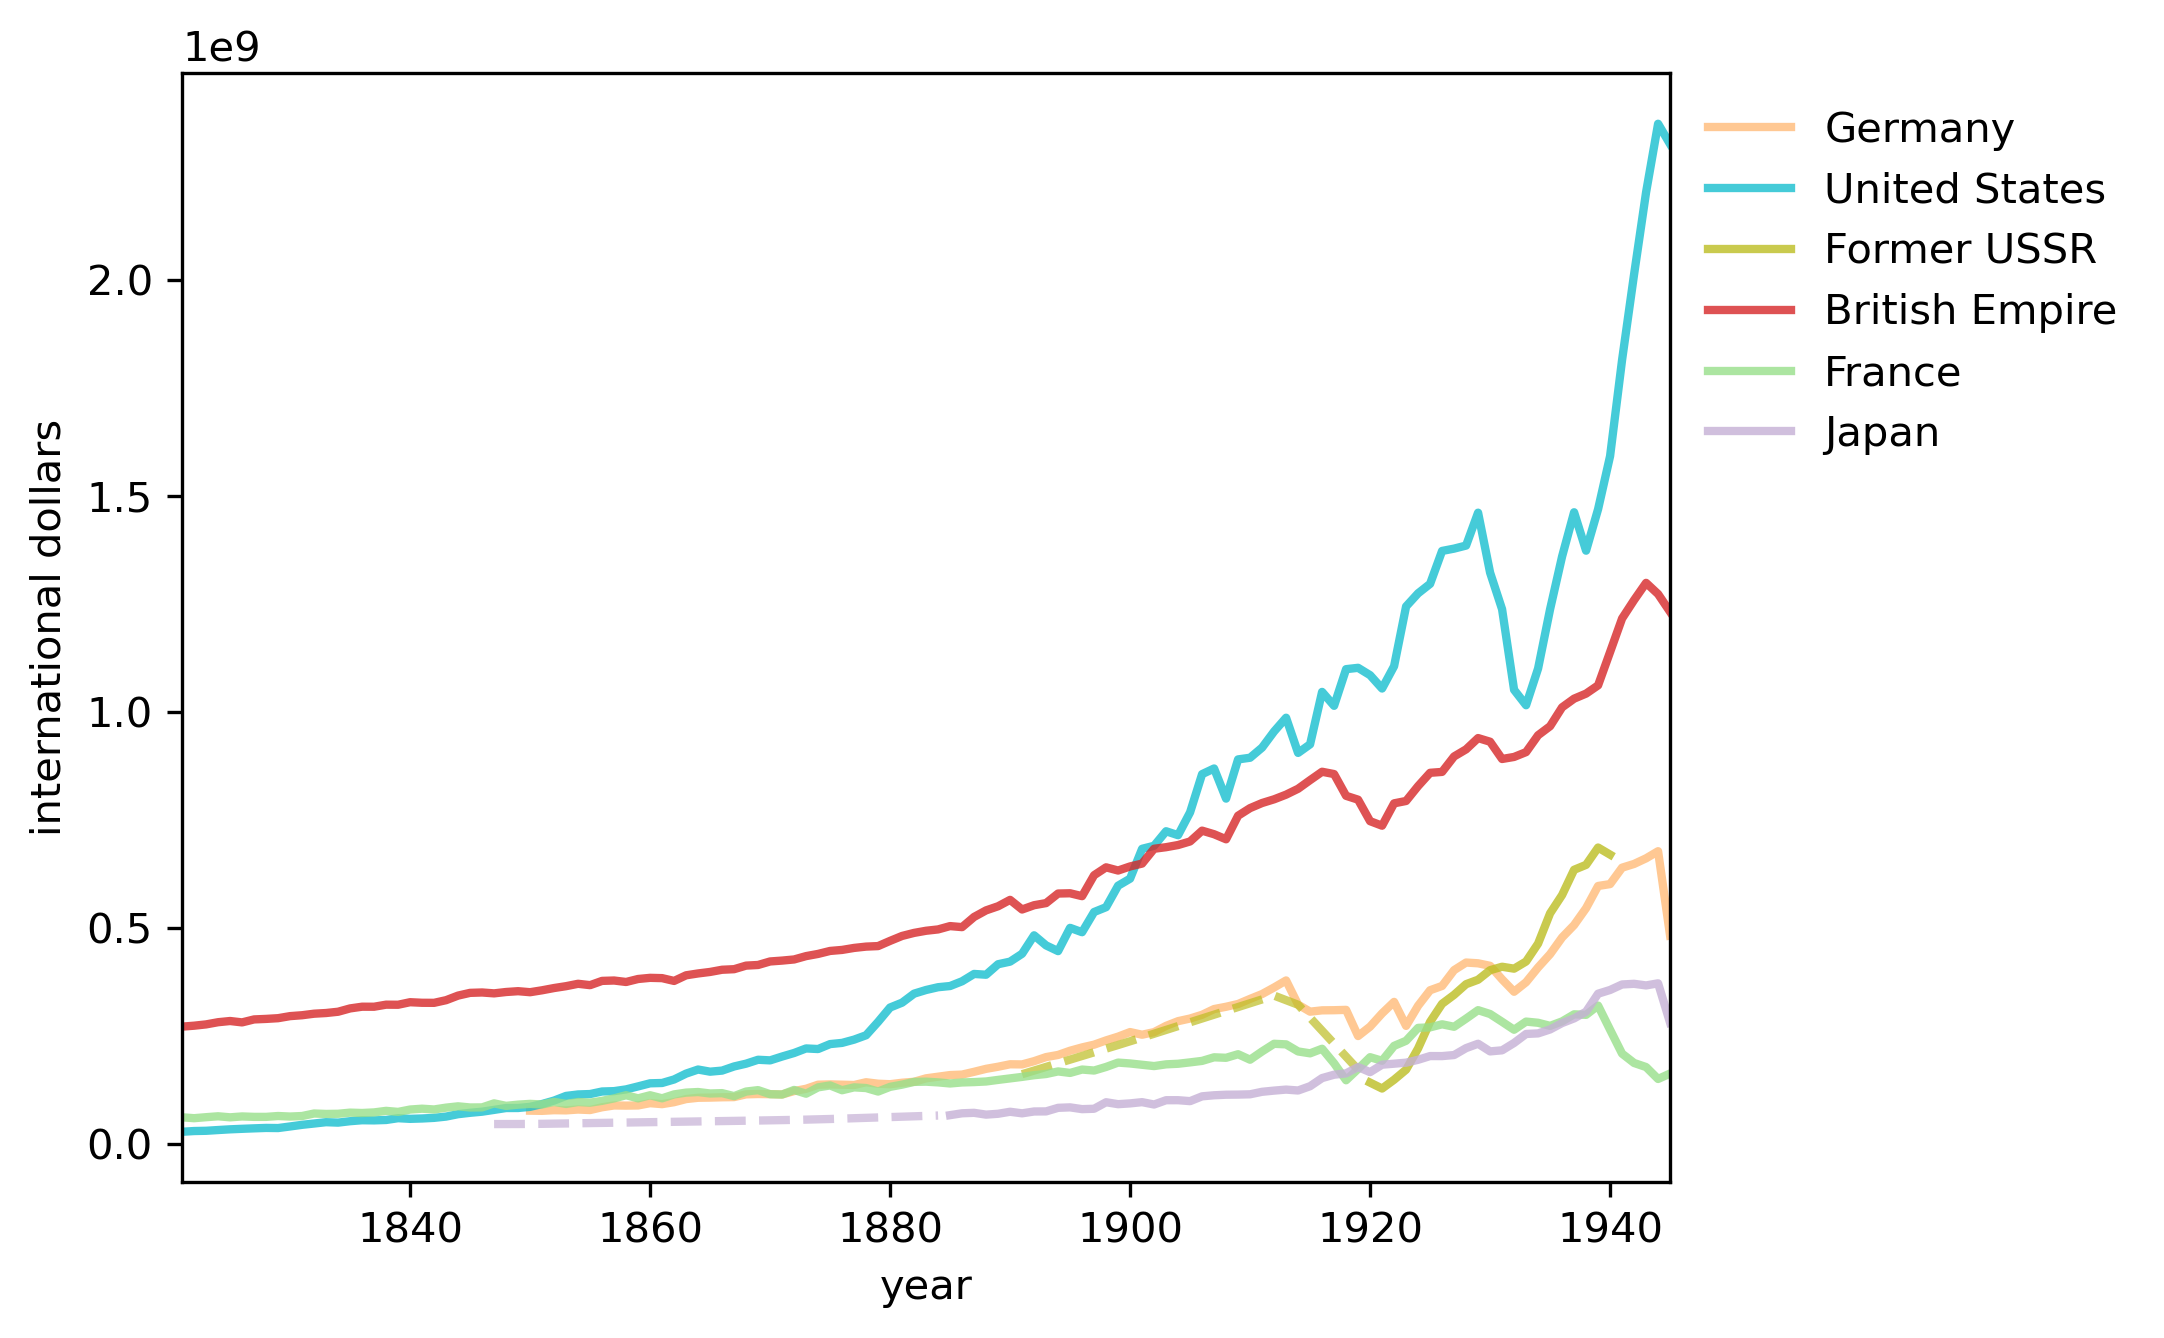

In [19]:
fig, ax = plt.subplots(dpi=300)
country = ['DEU', 'USA', 'SUN', 'BEM', 'FRA', 'JPN']
start_year, end_year = (1821, 1945)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)


directory = "d:\\Users\\User\\Documents\\Archivos Python VSCODE\\Long Run Growth - Economics Python Project\\reports\\figures"

plt.savefig(directory + "tooze_ch1_graph.png", dpi=300, bbox_inches='tight')
plt.show()

Al principio de esta conferencia, señalamos cómo el PIB estadounidense surgió de "la nada" a principios del siglo XIX para rivalizar con el PIB del Imperio Británico y superarlo a finales del siglo XIX, sentando las bases geopolíticas del "siglo (XX) americano".

Avancemos en el tiempo y comencemos aproximadamente donde se detuvo el gráfico de Tooze después de la Segunda Guerra Mundial.

Siguiendo el espíritu del análisis del capítulo 1 de Tooze, esto nos proporcionará cierta información sobre las realidades geopolíticas actuales.

## La era moderna (1950 a 2020)
El siguiente gráfico muestra la rapidez con la que ha crecido China, especialmente desde finales de la década de 1970.

Resulta tentador comparar este gráfico con el de la figura anterior que mostraba cómo Estados Unidos superaba al Reino Unido cerca del inicio del "siglo americano", una versión del gráfico que aparece en el capítulo 1 de [Tooze, 2014].

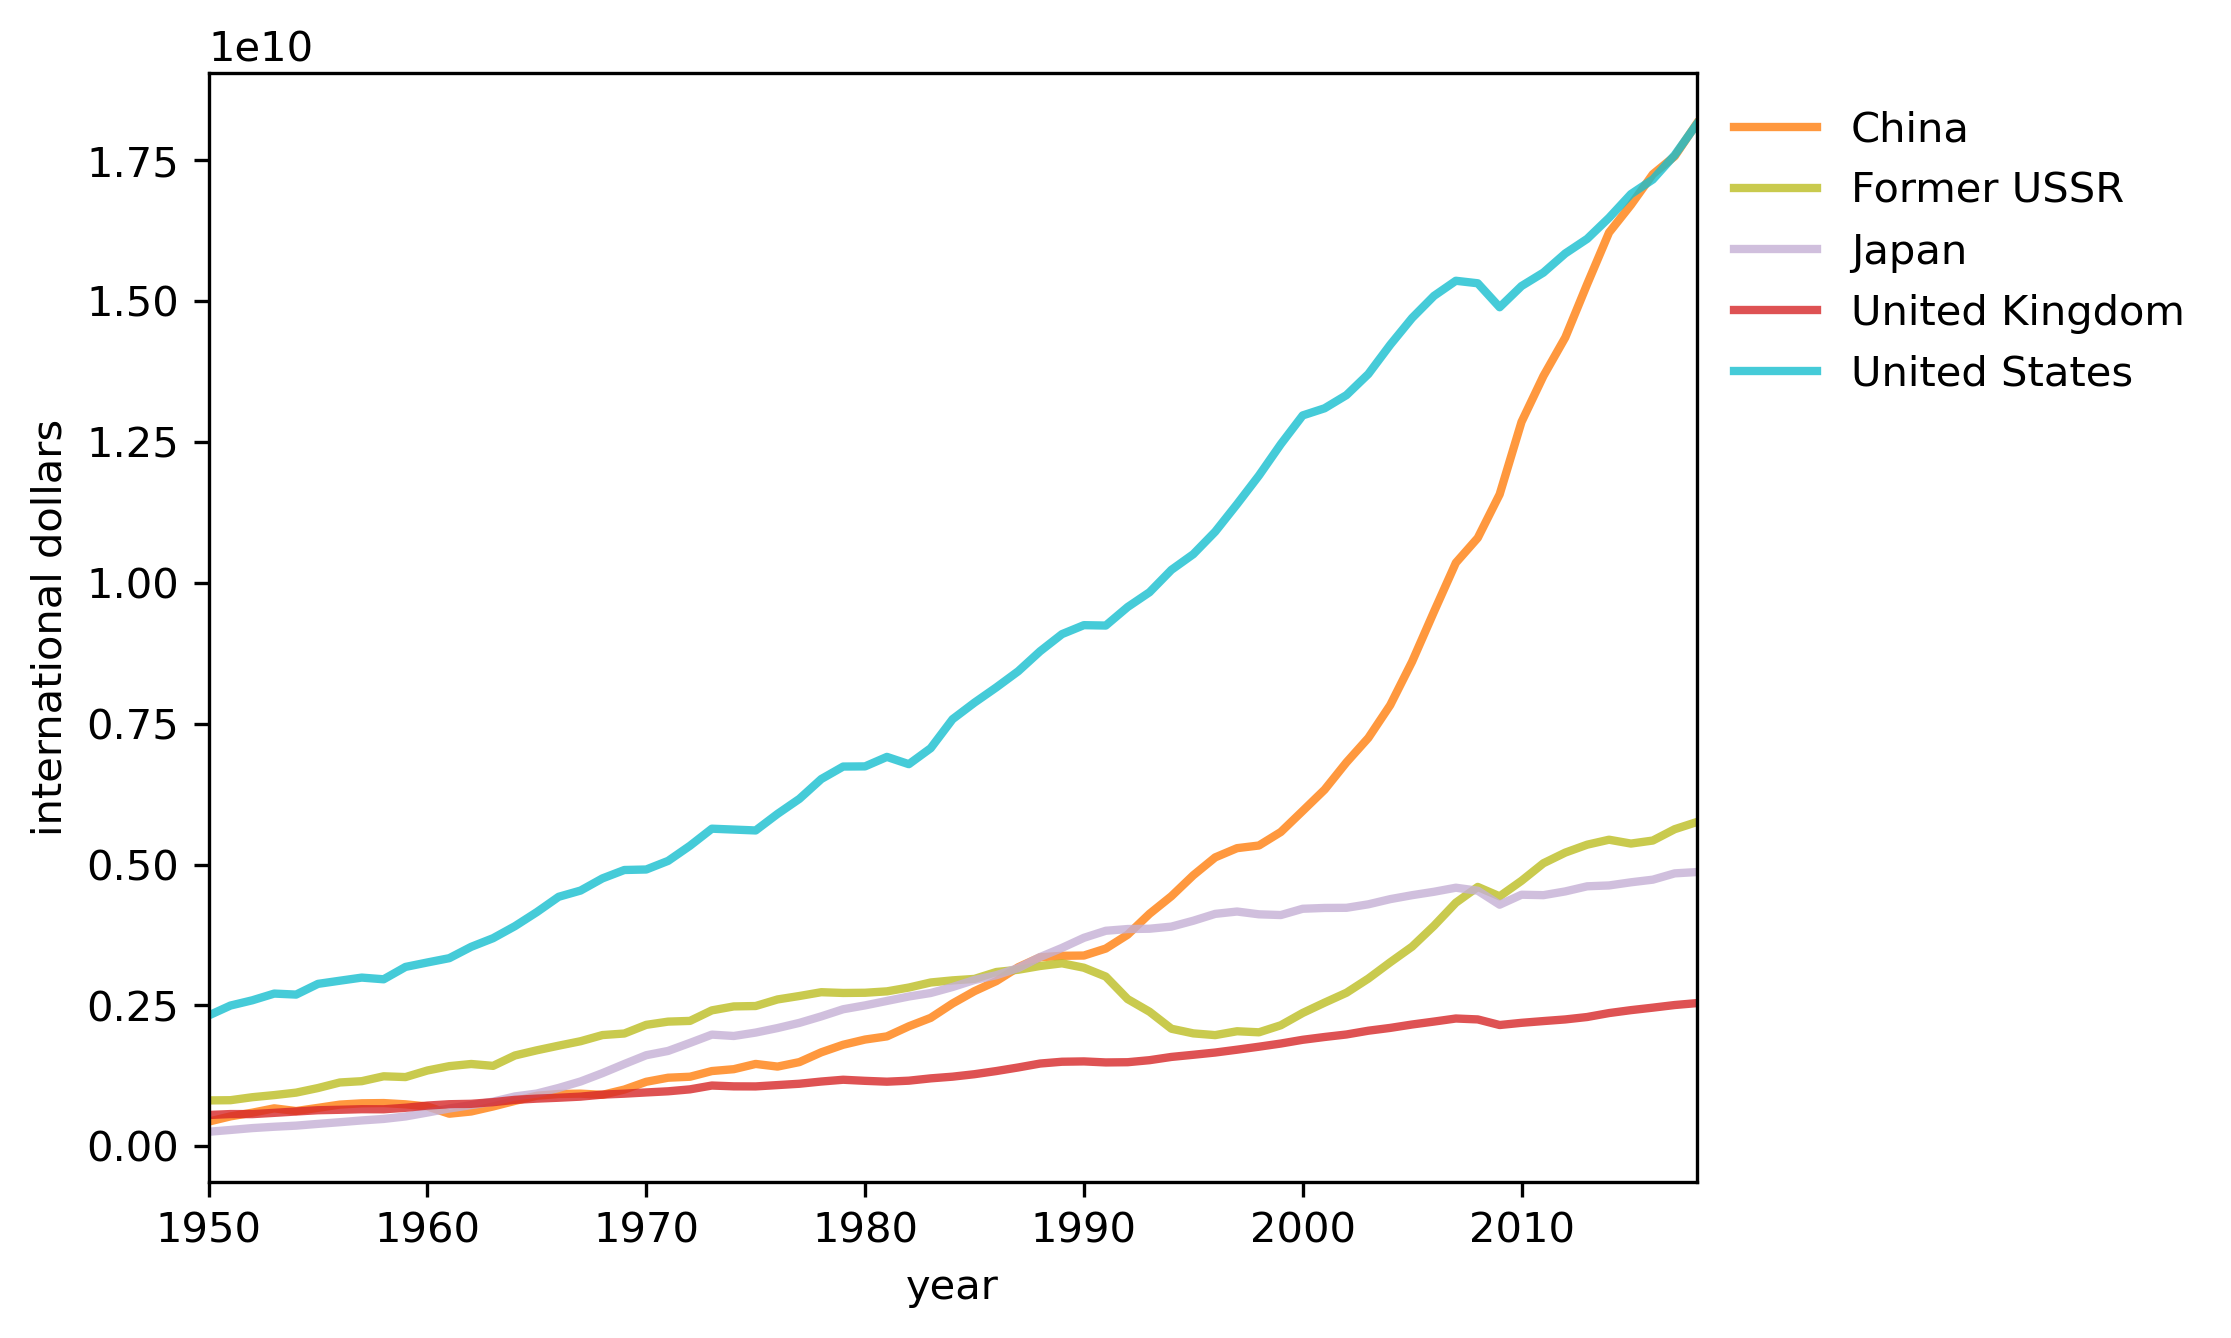

In [20]:
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'SUN', 'JPN', 'GBR', 'USA']
start_year, end_year = (1950, 2020)
draw_interp_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

## Análisis regional
A menudo queremos estudiar las experiencias históricas de países que no pertenecen al club de las "potencias mundiales".

El conjunto de datos Maddison Historical Statistics también incluye agregaciones regionales

In [26]:
# Leer el archivo CSV usando pandas
df2 = pd.read_excel(xlsx_path,sheet_name='Regional data',header=(0,1,2),index_col=0)
df2.columns = df2.columns.droplevel(level=2)

# Mostrar las primeras filas del dfFrame

df.head()

country   gdppc     pop        gdp
countrycode year                                        
AFG         1820  Afghanistan     NaN  3280.0        NaN
            1870  Afghanistan     NaN  4207.0        NaN
            1913  Afghanistan     NaN  5730.0        NaN
            1950  Afghanistan  1156.0  8150.0  9421400.0
            1951  Afghanistan  1170.0  8284.0  9692280.0

Podemos guardar los datos brutos en un formato más cómodo para construir una única tabla de PIB regional per cápita

In [27]:
regionalgdp_pc = df2['gdppc_2011'].copy()
regionalgdp_pc.index = pd.to_datetime(regionalgdp_pc.index, format='%Y')

Vamos a interpolar en función del tiempo para rellenar los huecos en el conjunto de datos con el fin de representar gráficamente

In [29]:
regionalgdp_pc.interpolate(method='time', inplace=True)

Si nos fijamos más detenidamente, comparemos las series cronológicas de los vástagos occidentales y el África subsahariana con las de distintas regiones del mundo.

De nuevo vemos la divergencia de Occidente con respecto al resto del mundo tras la Revolución Industrial y la convergencia del mundo tras la década de 1950

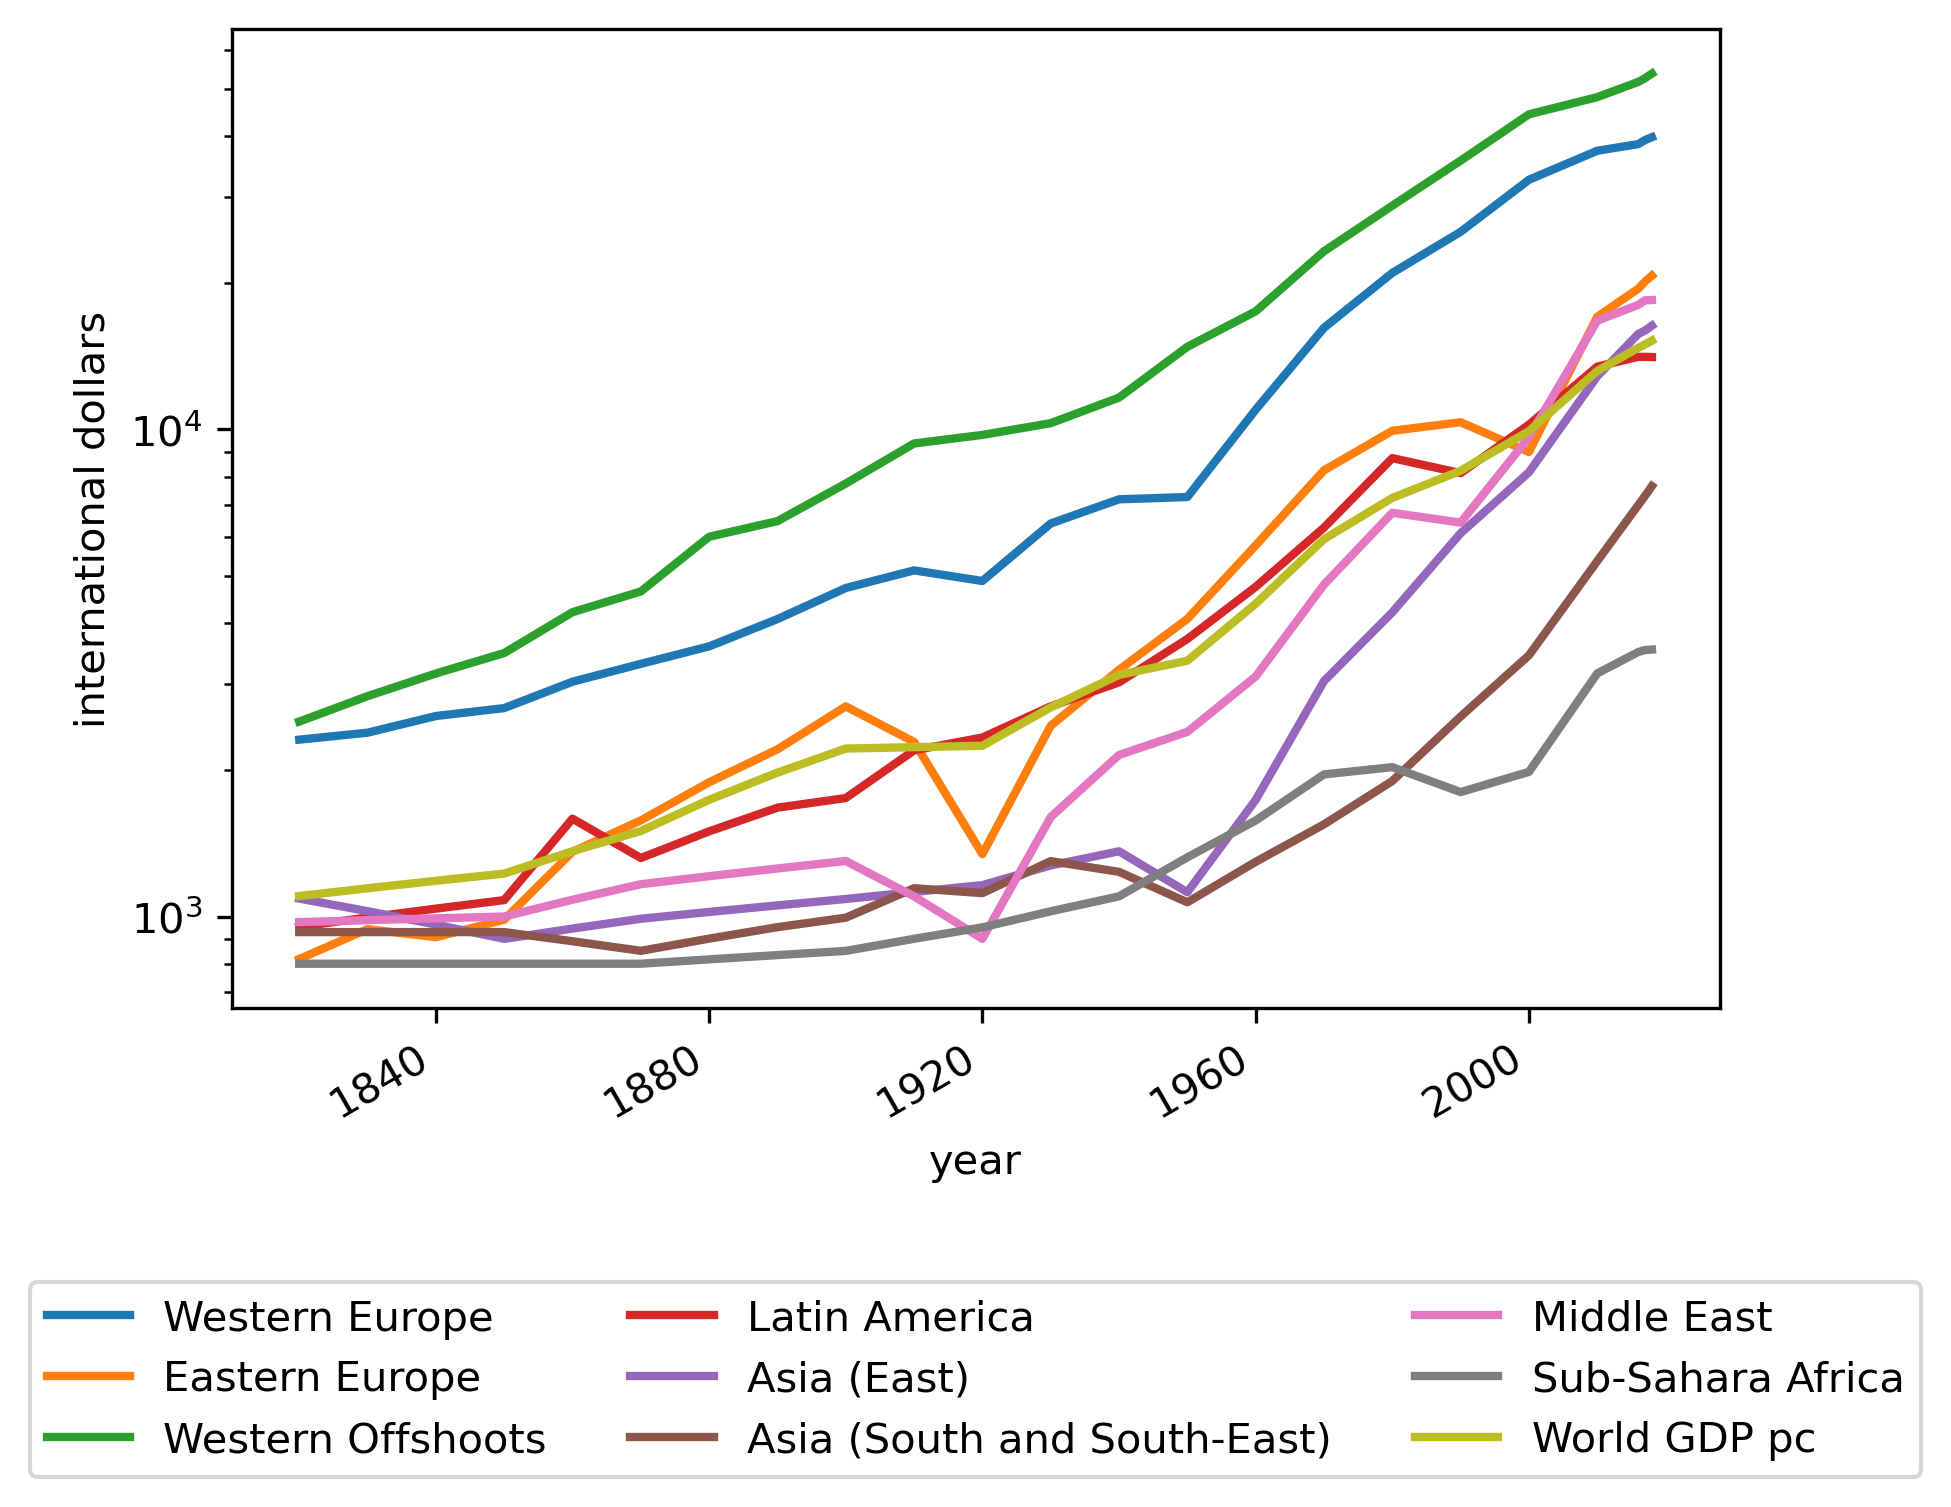

In [30]:
fig, ax = plt.subplots(dpi=300)
regionalgdp_pc.plot(ax=ax, xlabel='year',
                    lw=2,
                    ylabel='international dollars')
ax.set_yscale('log')
plt.legend(loc='lower center',
           ncol=3, bbox_to_anchor=[0.5, -0.5])
plt.show()